In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
from matplotlib.animation import FuncAnimation

In [18]:
N = 4096
tstop = 25 # collapse time
dtime = 0.1 # integration time
dtout = 1 # step output time
epsilon = 0.03

#n_outputs = math.floor(tstop / dtout)
#n_outputs = 52
#print(n_outputs)

# brute force 
n_outputs = 0

with open("treecode_out.txt", "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
            
print(n_outputs) 

49


In [19]:
# Reading masses from the output

data_mass = np.empty(N*n_outputs)

with open("treecode_out.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()

In [20]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open("treecode_out.txt", "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

In [21]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

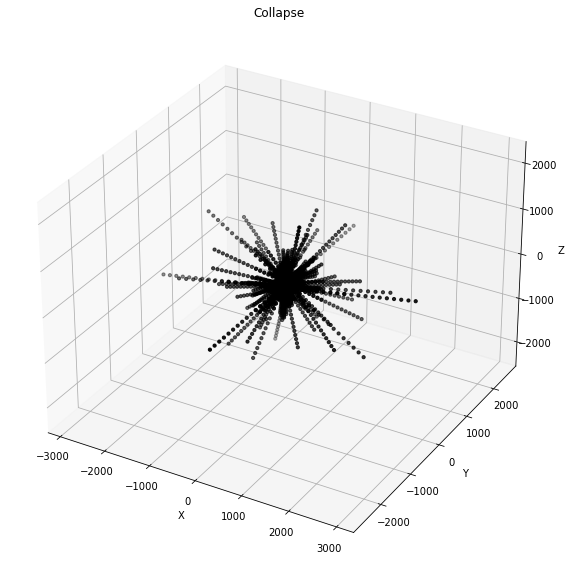

In [22]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='black', s=10)
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Collapse')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


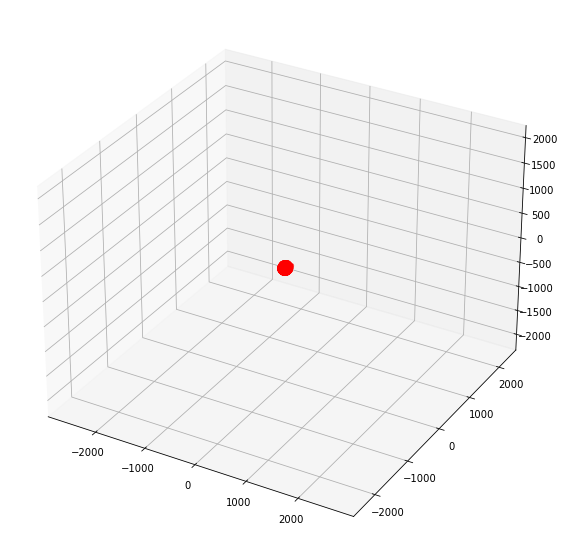

In [23]:
num_frames = len(data_coordinates) // N
#num_frames = n_outputs

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:N], y[:N], z[:N], c='r', marker='o')

ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(y), np.max(y))
ax.set_zlim(np.min(z), np.max(z))

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('prova1.gif', writer='imagemagick', fps=10)

plt.show()